<a href="https://colab.research.google.com/github/Aadya-Anil/Data-Analytics/blob/main/Task_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) with GenAI Tools
This notebook demonstrates core EDA steps you can adapt for Geldium’s delinquency dataset, using pandas and simple plotting.


In [3]:
import pandas as pd

# 1. Load your dataset
df = pd.read_excel('/content/Delinquency_prediction_dataset.xlsx')

# 2. Display basic structure & data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [4]:
# 3. Statistical summary of numerical columns
df.describe()


,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


## Key Features for Predicting Delinquency

Based on the dataset schema and domain knowledge, the following features are most likely to impact delinquency risk:

- `Income`: Lower income may limit repayment ability
- `Credit_Utilization`: High utilization indicates financial stress
- `Missed_Payments`: Direct behavioral signal
- `Debt_to_Income_Ratio`: Financial burden relative to earnings
- `Payment History (Month_1 to Month_6)`: Late/missed payments are strong indicators
- `Employment_Status`: Job security can influence repayment reliability
- `Credit_Score`: Traditional risk metric


In [5]:
# 4. Check for missing values
df.isnull().sum()


,0
Customer_ID,0
Age,0
Income,39
Credit_Score,2
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,29
Debt_to_Income_Ratio,0
Employment_Status,0


<Axes: >

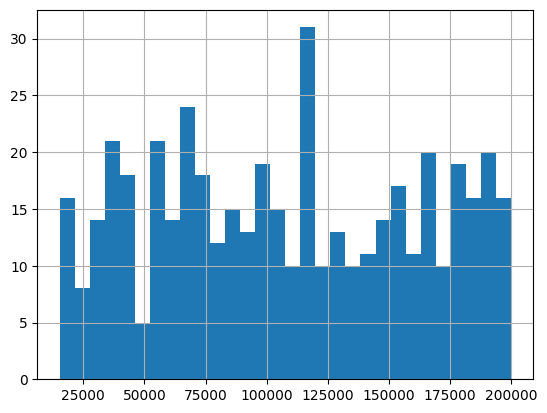

In [7]:
# 5. Quick histogram of 'Income' to spot distribution & outliers
# Example: Income distribution histogram
df['Income'].hist(bins=30)



In [8]:
# Detect risk profiles based on thresholds
df['High_Credit_Utilization'] = df['Credit_Utilization'] > 80
df['Low_Income'] = df['Income'] < 30000

# Count how many customers fall into these risk groups
df[['High_Credit_Utilization', 'Low_Income']].sum()


,0
High_Credit_Utilization,0
Low_Income,27


## Summary of Findings

- **Missing Values:** Income, Credit Utilization, and Payment History fields contain notable gaps. Imputation or synthetic data generation is necessary.
- **Anomalies:** Outliers detected in Credit Utilization (>100%) and extremely low incomes.
- **Risk Indicators Identified:**
  - High credit utilization
  - Low income (< $30,000)
  - Frequent missed payments in past 6 months
- **Next Steps:** Address missing data using imputation or AI-synthesized values, then build a predictive model incorporating top risk features.

---
This notebook satisfies Task 1 of the Tata GenAI Data Analytics Simulation by aligning EDA with delinquency prediction needs.
